<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP4/TP4_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Lectura de librerías
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def mandelbrot(re, im, max_iter):
  c = complex(re, im) #
  z = 0.0j #J permite crear un numero imaginario
  for i in range(max_iter):
    z=z*z+c
    if (z.real * z.real * z.real + z.imag * z.imag * z.imag) >=4:
      return i
  return max_iter

<Figure size 1440x1080 with 0 Axes>

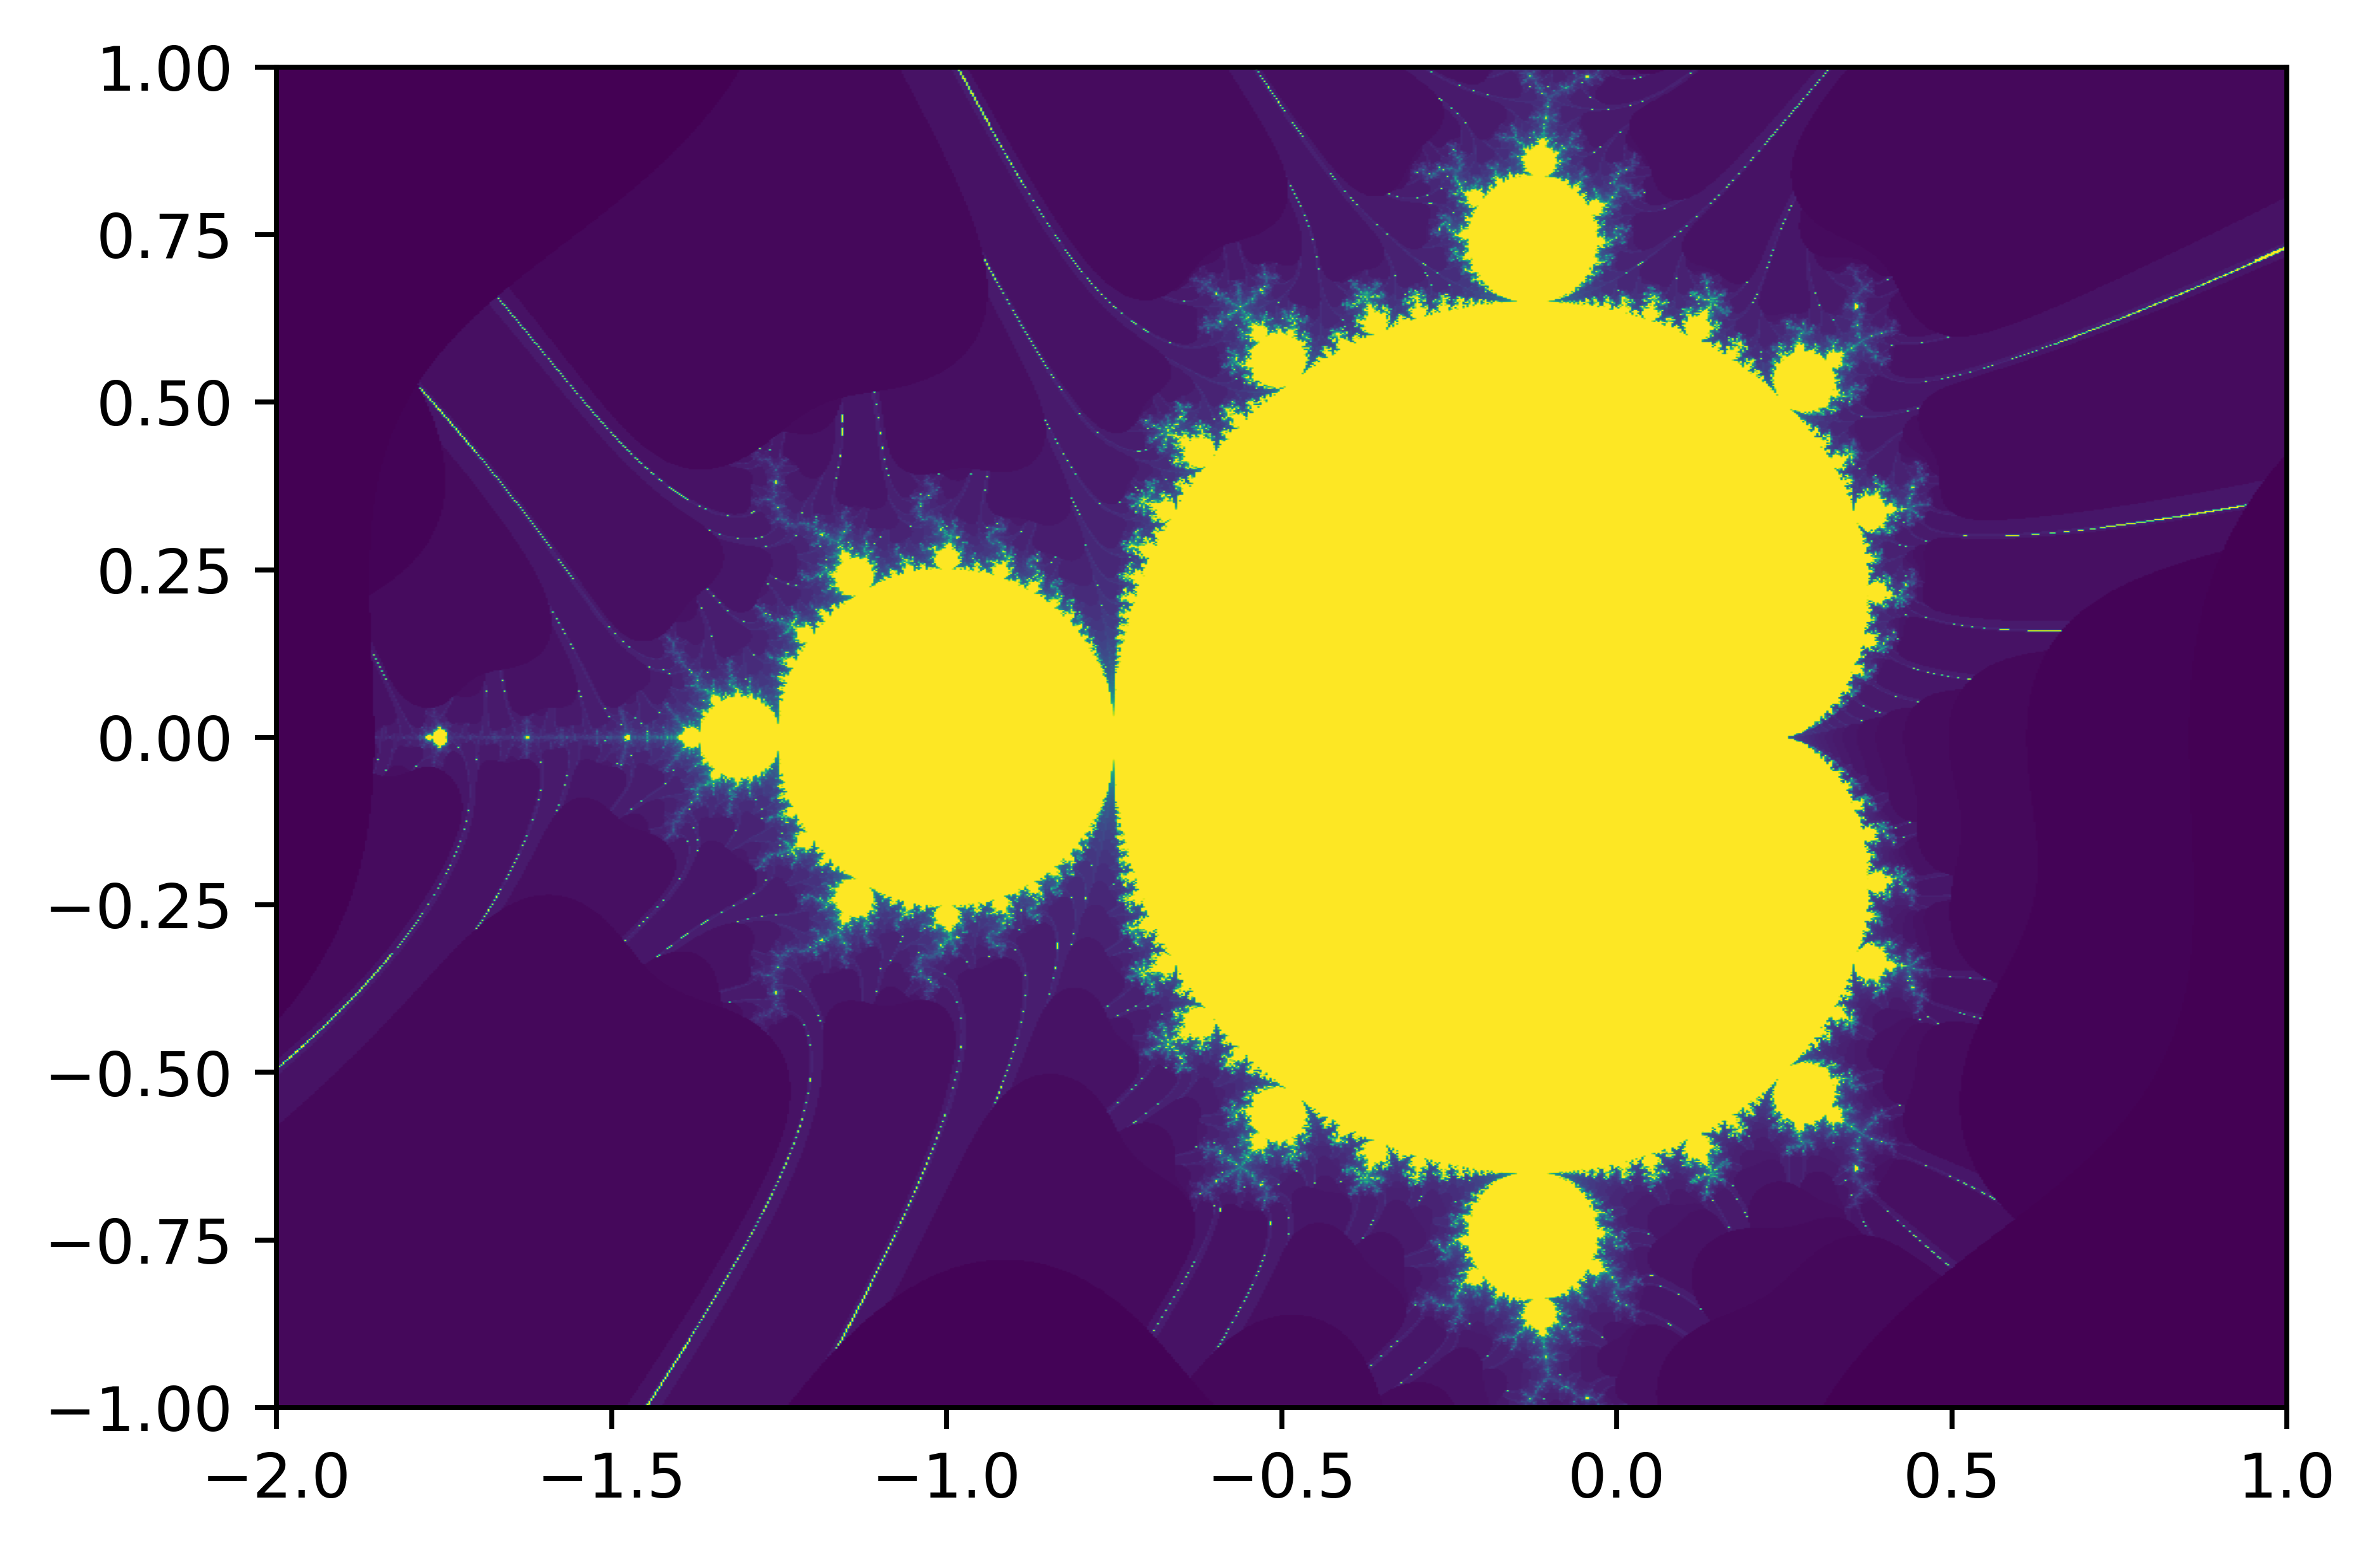

In [46]:
columnas = 1000
filas = 1000
plano = np.zeros([filas,columnas])

for indice_fila, re in enumerate(np.linspace(-2,1,num=filas)):
  for indice_columna, im in enumerate(np.linspace(-1,1,num=columnas)):
    plano [indice_columna,indice_fila] = mandelbrot(re,im,100)

plt.figure(figsize=(20, 15))
plt.figure(dpi=700)
plt.imshow(plano,cmap='viridis', extent = [-2,1,-1,1])
plt.show()

In [22]:
lado=720
tamano=[lado, lado]
zn=np.zeros(tamano)
mandelbrot=np.zeros(tamano)

##Se puebla la matriz 'c' con las coordenadas del plano complejo de -2 a 2 y de 
#-2i a 2i alrededor del origen.
paso=4/lado;
[X,Y]=np.meshgrid(lado, lado)
c=((X-lado/2)+(lado/2-Y))*paso;

pixelesAntes=0;   #Cantidad de pixeles dentro del Mandelbrot antes de comenzar.
dentro=np.find(c+1);   #1.- Lista todos los pixeles dentro del conjunto de Mandelbrot.
pixelesDespues=np.length(dentro); #Cantidad de pixeles dentro del Mandelbrot después de la iteración.
iteracion=0;
while(pixelesAntes!=pixelesDespues):
  iteracion=iteracion+1;
  pixelesAntes=pixelesDespues;   #Cantidad de pixeles que pertenecían al Mandelbrot al final de la iteración anterior.
  zn=zn(dentro)*2+c(dentro);   #2.- Iteramos Zn+1 = Zn^2 + c sobre los valores que sobrevivieron la iteración anterior.
  dentro=find(zn<2);   #3.- Encontramos los pixeles que sobreviven la presente iteración.
  pixelesDespues=length(dentro);   #Cantidad de pixeles que sobreviven la presente iteración.
  mandelbrot=iteracion;    #Asignamos el número de la iteración como color de los pixeles que sobrevivieron.
endwhile
mandelbrot=mandelbrot/iteracion;  #Renormaliza la imagen a una escala [0,1].

figure(1)
imshow(mandelbrot);   #Despliega el fractal en blanco y negro.

printf("Se alcanzo convergencia en la iteracion: %d.\n", iteracion);

AttributeError: ignored